# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [147]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [148]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

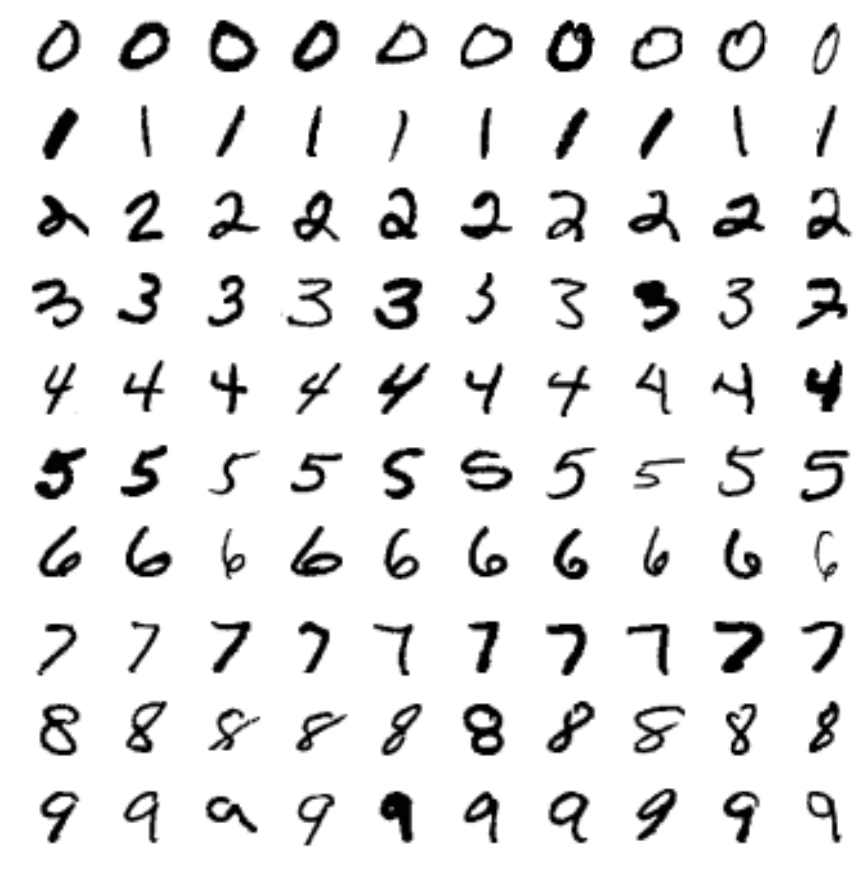

In [149]:
### STUDENT START ###
def plot_digits (data, n_rows, n_cols, figsize=(15,15)):
    """
    Input: digits data to be plotted, number of rows and columns of output plot matrix
    Output: plot of digits 
    """
    plt.figure(figsize = figsize)
    num_pixels_perside = 28
    # Iterate through each example and plot each one
    for example_i, img_values in enumerate(data):
        img_values = img_values.reshape((num_pixels_perside, num_pixels_perside))
        plt.subplot(n_rows, n_cols, example_i+1)
        plt.axis('off')
        plt.imshow(img_values, cmap='gray_r')


def P1(num_examples=10):
    # Input: number of examples shown for each digit
    # Output: grid of pictures of digits
    
    # Initialize array to hold digit values to be plotted    
    num_digits = len(np.unique(mini_train_labels))    
    digit_values = np.zeros((num_examples * num_digits, mini_train_data.shape[1]))
    
    # Iterate through each digit and store in digit_values
    for digit in range(num_digits):
        # Use training data set, select a subset corresponding to the current digit
        subset = mini_train_data [mini_train_labels == digit]
        
        # Randomly select num_examples data points to plot
        shuffle = np.random.permutation(np.arange(subset.shape[0]))
        digit_values[digit*num_examples : (digit+1)*num_examples] = subset[shuffle][:num_examples]
        
    plot_digits(digit_values, num_digits, num_examples, (15,15))
    ### STUDENT END ###
P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [150]:
def P2(k_values):
    ### STUDENT START ###
    # Input: list of k-values to be used in k-NN models
    # Output: list of accuracy of each k-NN model printed
    
    accuracy = []
    # Iterate with each k and build a k-NN model
    for k in k_values:
        model = KNeighborsClassifier(k)
        model.fit(mini_train_data, mini_train_labels)
        k_score = model.score(dev_data, dev_labels)
        
        # Build classification report for k=1
        if k==1:
            predictions = model.predict(dev_data)
            print ("Classification Report for k = {}".format(k))
            print (classification_report(dev_labels, predictions))
        
        print ("Accuracy for k = {} is {:.2f}%.".format(k, k_score*100))
        accuracy.append(k_score)
    ### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Classification Report for k = 1
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Accuracy for k = 1 is 88.80%.
Accuracy for k = 3 is 87.80%.
Accuracy for k = 5 is 86.90%.
Accuracy for k = 7 is 86.50%.
Accuracy for k = 9 is 86.30%.


ANSWER:  
For the 1-NN model, digit **9** is the most difficult digit, with the lowest F1 score of 0.80.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [151]:
def P3(train_sizes, accuracies):
    ### STUDENT START ###
    k = 1
    compute_time = []
    
    for size in train_sizes:
        # Shuffle data and labels of the 60,0000 traing data set
        shuffle = np.random.permutation(np.arange(train_data.shape[0]))
        train_data_bysize = train_data[shuffle][:size]
        train_lables_bysize = train_labels[shuffle][:size]

        # Start the timer and train model
        start_time = time.time()
        model = KNeighborsClassifier(k)
        model.fit(train_data_bysize, train_lables_bysize)
        
        # Compute accuracies and end timer
        accuracies.append(model.score(dev_data, dev_labels))
        end_time = time.time()
        compute_time.append(end_time - start_time)
    print ("The training set sizes, accuracies, and computation time are as follows:")
    return zip(train_sizes, accuracies, compute_time)
    ### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

The training set sizes, accuracies, and computation time are as follows:


[(100, 0.626, 0.1390230655670166),
 (200, 0.76700000000000002, 0.3203771114349365),
 (400, 0.83199999999999996, 0.6600770950317383),
 (800, 0.85999999999999999, 1.3567650318145752),
 (1600, 0.90500000000000003, 2.7282588481903076),
 (3200, 0.92700000000000005, 6.057765960693359),
 (6400, 0.94299999999999995, 12.305500030517578),
 (12800, 0.95799999999999996, 23.372845888137817),
 (25000, 0.96999999999999997, 50.83214211463928)]

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

Without transformation: the accuracy for n = 60,000 is predicted to be 1.30226575147
With logit transformation: the accuracy for n = 60,000 is predicted to be 0.999140075078


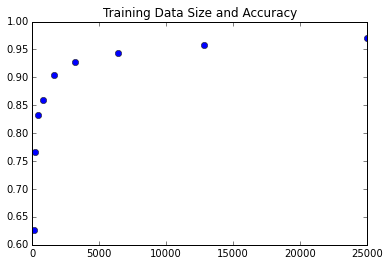

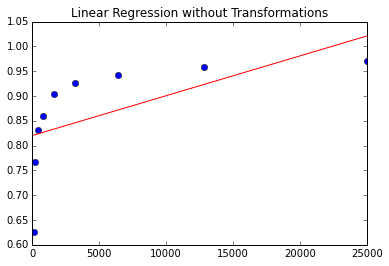

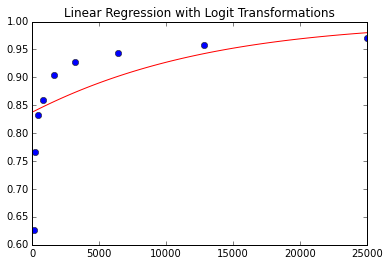

In [152]:
def P4(train_sizes, accuracies):

    ### STUDENT START ###
    # First make train_sizes and accuracies vectors that sklearn can use
    train_sizes = np.array(train_sizes).reshape(len(train_sizes), 1)
    accuracies = np.array(accuracies)
    
    # Visualize relationship between training size and accuracy
    plt.figure(1)
    plt.plot(train_sizes, accuracies, "bo")
    plt.title("Training Data Size and Accuracy")
    
    # Even though it doesn't look linear, let's fit a linear model
    model = LinearRegression()
    model.fit(train_sizes, accuracies)
    predictions = model.predict(train_sizes)
    plt.figure(2)
    plt.plot(train_sizes, accuracies, "bo", train_sizes, predictions, "r-")
    plt.title("Linear Regression without Transformations")
    
    # n = 60,000 prediction gives nonsensial answer
    large_n_pred = model.predict(np.array([60000]))    
    print ("Without transformation: the accuracy for n = 60,000 is predicted to be {}".format(large_n_pred))
    
    # Because the output can only be between 0 and 1, let's transform the output variable into a logit
    # Transform accuracies into logit
    logit = np.log(accuracies / (1 - accuracies))
    # Fit model with train_sizes and the logit we just created
    model_logit = LinearRegression()
    model_logit.fit(train_sizes, logit)
    # Create a continuous train_sizes vector so we can plot the logit prediction
    train_cont = np.linspace(100,25000,100)
    train_cont = train_cont.reshape(len(train_cont), 1)
    # Generated predictions
    predictions = 1 / (1 + np.exp(-model_logit.predict(train_cont)))
    plt.figure(3)
    plt.plot(train_sizes, accuracies, "bo", train_cont, predictions, "r-")
    plt.title("Linear Regression with Logit Transformations")
    
    # n = 60,000 prediction with logit transformation gives a better estimate
    large_n_pred_logit = 1 / (1 + np.exp(-model_logit.predict(np.array([60000]))))
    print ("With logit transformation: the accuracy for n = 60,000 is predicted to be {}".format(large_n_pred_logit))
    
    ### STUDENT END ###

P4(train_sizes, accuracies)

ANSWER:  
For n = 60,000, the plain-vanilla linear regression model predicts an accuray of 1.25, an impossible figure. The problem is that the relationship between training data size and accuracy is clearly not linear (as shown by the plots above).

Because accuracies can only take values between 0 and 1, we can transform this variable into a logit first and fit a linear regression line afterwards. If we do that, we obtain an accuracy prediction of 0.999 for n = 60,000. This number is very close to 100% and likely not very accurate, but it is an improvement over the previous attempt.

(5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

array([[ 97,   0,   0,   0,   0,   0,   2,   0,   0,   0],
       [  0, 105,   0,   0,   0,   0,   0,   0,   0,   0],
       [  4,   4,  81,   4,   0,   0,   0,   4,   3,   2],
       [  1,   0,   0,  75,   0,   3,   0,   3,   1,   3],
       [  0,   2,   0,   0,  85,   0,   3,   0,   0,  14],
       [  2,   0,   0,   9,   0,  76,   0,   1,   1,   2],
       [  1,   1,   1,   0,   1,   0,  94,   0,   0,   0],
       [  1,   4,   0,   1,   1,   0,   0, 104,   0,   2],
       [  0,   2,   0,   5,   0,   2,   1,   0,  84,   2],
       [  1,   0,   0,   3,   9,   1,   0,   5,   0,  87]])

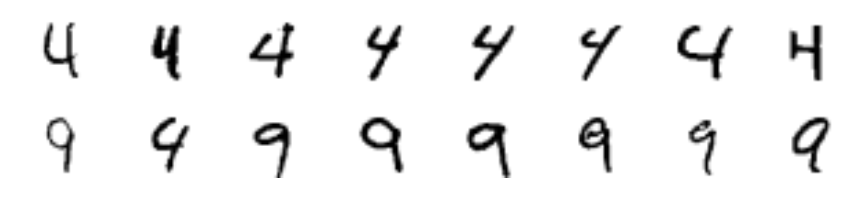

In [153]:
def P5():
    ### STUDENT START ###
    k = 1
    # Train model
    model = KNeighborsClassifier(k)
    model.fit(mini_train_data, mini_train_labels)
    # Predict and return confusion matrix
    predictions = model.predict(dev_data)
    
    ## Plot most confused digits (4 and 9)
    pair = [4,9]
    num_examples_per_pair = 8
    num_digits = 2
    # Initialize matrix of rows we want to plot
    confused_rows = np.zeros((num_examples_per_pair * num_digits, mini_train_data.shape[1]))
    
    # Pick out the pairs we want to plot (actual:4, predicted:9)
    actual_4s = dev_data[np.all([dev_labels == pair[0], predictions == pair[1]], axis=0)]
    confused_rows[:num_examples_per_pair] = actual_4s[:num_examples_per_pair]
    
    # actual:9, predicted:4    
    actual_9s = dev_data[np.all([dev_labels == pair[1], predictions == pair[0]], axis=0)]
    confused_rows[num_examples_per_pair:] = actual_9s[:num_examples_per_pair]
    
    # Generate plots
    plot_digits(confused_rows, num_digits, num_examples_per_pair, (15,3))

    return confusion_matrix(dev_labels, predictions)
    ### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [154]:
### STUDENT START ###
def blur_digit(digit, blur_factor=0.5):
    '''
    Inputs: array of pixel values of a single digit
            blur_factor: weight of the original pixel (Pixel 5) in the blurring process, fine-tune to desired number
    Outputs: array of pixel values of the blurred digit
    '''
    # Assume the following naming scheme for the neighboring pixels:
    # Row above: pixels 1, 2, 3
    # Row with original pixel: 4, 5, 6 (5 is the original pixel)
    # Row below: pixels 7, 8, 9
    
    # Weight of neighboring pixels
    blur_neighbor = (1.0 - blur_factor) / 8
    
    # Reshape the digit pixel values and initialize the blurred digit
    pixels_side = 28
    digit = digit.reshape(pixels_side, pixels_side)
    transformed_digit = np.zeros(digit.shape)
        
    # Iterate through each pixel to map to transformed_digit
    for row in range(pixels_side):
        for col in range(pixels_side):
            # Extreme pixels' neighbors get a value of 0
            pixel_1 = 0 if (row==0 or col==0)   else digit[row-1][col-1]
            pixel_2 = 0 if (row==0)             else digit[row-1][col]
            pixel_3 = 0 if (row==0 or col==27)  else digit[row-1][col+1]
            pixel_4 = 0 if (col==0)             else digit[row][col-1]
            pixel_5 = digit[row][col]
            pixel_6 = 0 if (col==27)            else digit[row][col+1]
            pixel_7 = 0 if (row==27 or col==0)  else digit[row+1][col-1]
            pixel_8 = 0 if (row==27)            else digit[row+1][col]
            pixel_9 = 0 if (row==27 or col==27) else digit[row+1][col+1]
            # Take a weighted average of the original pixel and the neighbor pixels
            transformed_digit[row][col] = blur_factor * pixel_5 + blur_neighbor * (
            pixel_1 + pixel_2 + pixel_3 + pixel_4 + pixel_6 + pixel_7 + pixel_8 + pixel_9)
    return transformed_digit.flatten()

def blur_data(data, blur_factor=0.5):
    """
    Input: a matrix of example digits
    Output: a matrix of blurred example digits
    """
    blurred_data = np.zeros(data.shape)
    for index, digit in enumerate(blurred_data):
        blurred_data[index] = blur_digit(data[index], blur_factor)
    return blurred_data

def P6(train_set, train_set_labels, test_set, test_set_labels):
    """
    Inputs: Training data, labels, and test data, labels
    Output: Plot of accuracy as a function of blur parameter
    """
    # Preprocess blurring
    blur = 0.5
    train_set_blurred = blur_data(train_set, blur)
    test_set_blurred = blur_data(test_set, blur)
    k = 1
    
    # Fit Model 1 (preprocess the training data but not the dev data)
    model_1 = KNeighborsClassifier(k)
    model_1.fit(train_set_blurred, train_set_labels)
    print ("Accuracy for Model 1 (blur = 0.5) is {}.".format(model_1.score(test_set, test_set_labels)))
    
    # Fit Model 2 (preprocess the dev data but not the training data)
    model_2 = KNeighborsClassifier(k)
    model_2.fit(train_set, train_set_labels)
    print ("Accuracy for Model 2 (blur = 0.5) is {}.".format(model_2.score(test_set_blurred, test_set_labels)))
    
    # Fit Model 3 (preprocess both training and dev data)
    model_3 = KNeighborsClassifier(k)
    model_3.fit(train_set_blurred, train_set_labels)
    print ("Accuracy for Model 3 (blur = 0.5) is {}.".format(model_3.score(test_set_blurred, test_set_labels)))
    
    # Let's vary the blur amount to see how the three models behave
    blur_range = np.linspace(0, 1.0, num=11)
    k = 1
    model_1_accuracy = []
    model_2_accuracy = []
    model_3_accuracy = []
    
    for blur in blur_range:
        # Preprocess
        train_set_blurred = blur_data(train_set, blur)
        test_set_blurred = blur_data(test_set, blur)
        # Train
        model_1 = KNeighborsClassifier(k)
        model_1.fit(train_set_blurred, train_set_labels)
        model_2 = KNeighborsClassifier(k)
        model_2.fit(train_set, train_set_labels)
        model_3 = KNeighborsClassifier(k)
        model_3.fit(train_set_blurred, train_set_labels)
        # Predict
        model_1_accuracy.append(model_1.score(test_set, test_set_labels))
        model_2_accuracy.append(model_2.score(test_set_blurred, test_set_labels))
        model_3_accuracy.append(model_3.score(test_set_blurred, test_set_labels))
    return (blur_range, model_1_accuracy, model_2_accuracy, model_3_accuracy)

(blur_range, model_1_accuracy, model_2_accuracy, model_3_accuracy) = P6(mini_train_data, mini_train_labels, dev_data, dev_labels)
### STUDENT END ###

Accuracy for Model 1 (blur = 0.5) is 0.904.
Accuracy for Model 2 (blur = 0.5) is 0.876.
Accuracy for Model 3 (blur = 0.5) is 0.903.


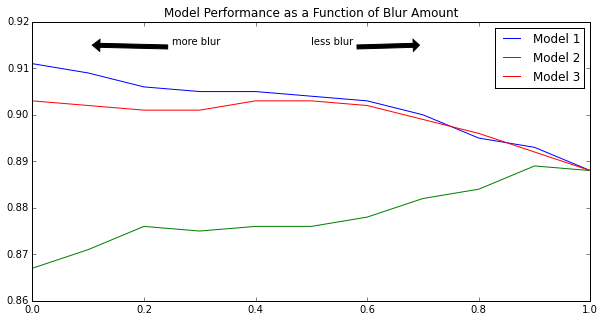

In [155]:
plt.figure(figsize=(10,5))
plt.plot(blur_range, model_1_accuracy, label = "Model 1")
plt.plot(blur_range, model_2_accuracy, label = "Model 2")
plt.plot(blur_range, model_3_accuracy, label = "Model 3")
plt.legend()
plt.annotate('more blur', xy=(0.1, 0.915), xytext=(0.25, 0.915), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('less blur', xy=(0.7, 0.915), xytext=(0.5, 0.915), arrowprops=dict(facecolor='black', shrink=0.05))
plt.title("Model Performance as a Function of Blur Amount")
 

ANSWER:  
Model 1 (blurring training data but not the test data) gives consistently better performance across blur amounts. Model 2 (blurring test data only) performed the worst, while Model 3 came in the middle.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [156]:
### STUDENT START ###

def multi_data(data, multi_thresholds):
    """
    Inputs: data with features that need to be turned into 3 discrete classes, thresholds for the splits
    Outputs: transformed data with discrete features
    """
    multi_data = np.zeros(data.shape)
    # Iterate through each digit to convert to 3 classes according to the thresholds
    for index, digit in enumerate(data):
        multi_data[index][digit < multi_thresholds[0]] = 0
        multi_data[index][np.all([digit >= multi_thresholds[0], digit < multi_thresholds[1]], axis=0)] = 1
        multi_data[index][digit >= multi_thresholds[1]] = 2
    return multi_data

def P7(train_set, train_labels, test_set, test_labels):
    ## BernoulliNB Step
    # Binarize with BernoulliNB and use a threshold of 0.5
    alpha = 1
    threshold = 0.5
    Bern_model = BernoulliNB(alpha=alpha, binarize=threshold)
    Bern_model.fit(train_set, train_labels)
    print (Bern_model.score(test_set, test_labels))
    
    ## MultinomialNB Step
    # First map pixel values to white, gray, and black
    multi_thresholds = [0.2, 0.8]
    multi_train_set = multi_data(train_set, multi_thresholds)
    multi_test_set = multi_data(test_set, multi_thresholds)
    
    # Fit model
    Multi_model = MultinomialNB(alpha=alpha)
    Multi_model.fit(multi_train_set, train_labels)    
    print (Multi_model.score(multi_test_set, test_labels))
    
    ### STUDENT END ###

P7(mini_train_data, mini_train_labels, dev_data, dev_labels)

0.817
0.797


ANSWER:  
BernoulliNB gives an accuracy of 81.7%, while MultinomialNB is slightly worse at 79.7%. MultinomialNB doesn't quite work as well because the "gray" values are likely not very good at predicting digits and do not add much value to the model. There might be a small degree of overfitting with the multinomial model. The binary model works better in this case in generalizing to the dev data.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [157]:
def P8(alphas):

    ### STUDENT START ###
    threshold = 0.5
    Grid = GridSearchCV(BernoulliNB(binarize=threshold), alphas)
    Grid.fit(mini_train_data, mini_train_labels)
    return Grid

    ### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

In [158]:
print nb.grid_scores_
print nb.best_params_

[mean: 0.09200, std: 0.00080, params: {'alpha': 0.0}, mean: 0.81800, std: 0.02216, params: {'alpha': 0.0001}, mean: 0.82000, std: 0.02073, params: {'alpha': 0.001}, mean: 0.82100, std: 0.01811, params: {'alpha': 0.01}, mean: 0.81600, std: 0.01955, params: {'alpha': 0.1}, mean: 0.80300, std: 0.01580, params: {'alpha': 0.5}, mean: 0.80200, std: 0.01767, params: {'alpha': 1.0}, mean: 0.79700, std: 0.01827, params: {'alpha': 2.0}, mean: 0.76000, std: 0.01383, params: {'alpha': 10.0}]
{'alpha': 0.01}


ANSWER:  
Alpha of 0.01 is best-performing at 82.1%, though the accuracies among the alphas aren't terribly large, besides for alpha=0. The accuracy is only 9.2% for alpha of 0. This makese sense because the lack of smoothing can cause many estimated probabilities to become zero when one of the counts(x,y) is zero, throwing away valuable information in the data.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

Accuracy for untransformed data with GaussianNB: 62.7%
Accuracy for transformed data with GaussianNB: 81.0%


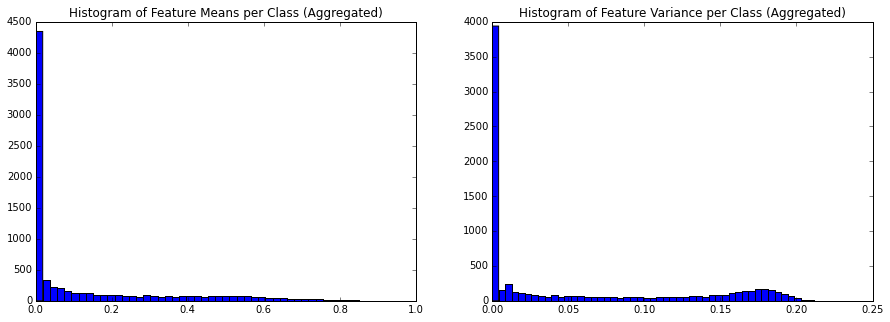

In [159]:
### STUDENT START ###
def P9():
    model = GaussianNB()
    model.fit(mini_train_data, mini_train_labels)
    print ("Accuracy for untransformed data with GaussianNB: {}%"
           .format(model.score(dev_data, dev_labels)*100))
    # GNB with unmodified data has an accuracy of 57.7%, which is quite low compared to BernoulliNB and MultiNB
    # Plot mean's and var's of each feature
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.hist(model.theta_.flatten(), 50)
    plt.title("Histogram of Feature Means per Class (Aggregated)")
    plt.subplot(1,2,2)
    plt.hist(model.sigma_.flatten(), 50)
    plt.title("Histogram of Feature Variance per Class (Aggregated)")
    
    # The features highly positively skewed with many very small means and variances
    # We can add some noise to smooth
    mini_train_data_transformed = (mini_train_data + np.random.uniform(size = mini_train_data.shape))
    dev_data_transformed = (dev_data + np.random.uniform(size = dev_data.shape))
    model_transformed = GaussianNB()
    model_transformed.fit(mini_train_data_transformed, mini_train_labels)
    print ("Accuracy for transformed data with GaussianNB: {}%"
           .format(model_transformed.score(dev_data_transformed, dev_labels)*100))
    ### STUDENT END ###

P9()

ANSWER:  
GaussianNB with the original train_data is only able achieve an accuracy of 63%. Examing the histogram of feature means per class, we see a lot of zero's (image is mostly white). We can try smoothing out the distribution by adding some noise from a uniform(0,1) distribution. This is similar to pixel blurring in the previous exercise. The accuracy is now 81%, which is close to the accuracy of BernoulliNB.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

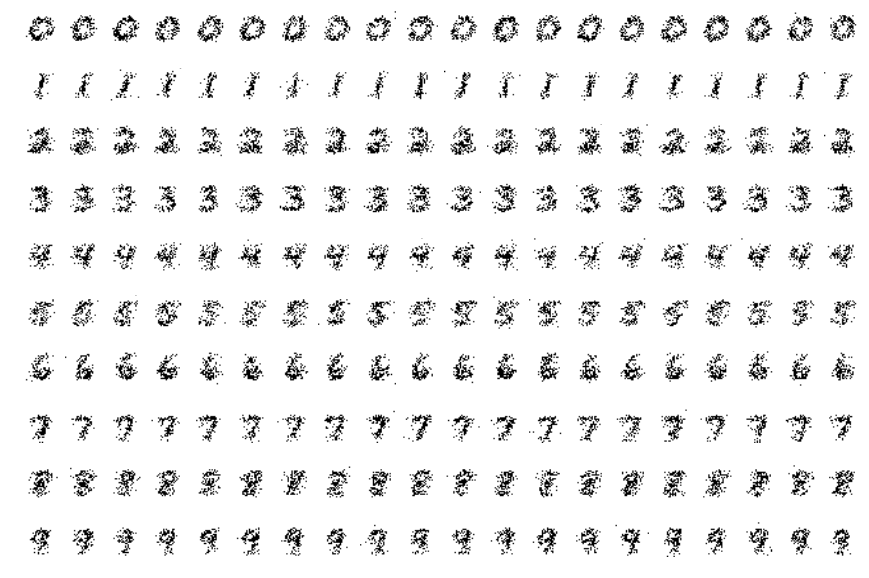

In [160]:
def P10(num_examples):
    ### STUDENT START ###
    
    # Train BernoulliNB model with train_data
    alpha = 0.1
    threshold = 0.5
    model = BernoulliNB(alpha=alpha, binarize=threshold)
    model.fit(mini_train_data, mini_train_labels)
    # Exponentiate to obtain matrix of P(pixel_i = 1 | digit)
    probs = np.exp(model.feature_log_prob_)
    
    # Input some parameters
    pixels_side = 28
    num_digits = 10
    plt.figure(figsize = (15,10))
    
    # Iterate through a 10x20 grid to plot each example
    for digit in range(num_digits):
        for example in range(num_examples):
            plot_number = digit * num_examples + (example+1)
            # Generate a boolean vector according to the specified probabilities
            generated_pixels = probs[digit] > np.random.rand(probs.shape[1])
            generated_pixels = generated_pixels.reshape(pixels_side, pixels_side)
            # Plot each example onto its own subplot
            plt.subplot(num_digits, num_examples, plot_number)
            plt.axis('off')
            plt.imshow(generated_pixels, cmap='gray_r')
    ### STUDENT END ###

P10(20)

ANSWER:  
The simulated digits are essentially averages of the training digits. They bare a strong resemblance to the training digits, albeit with some noise from the generative process.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [161]:
def P11(buckets, correct, total):    
    ### STUDENT START ###
    
    # Train BernoulliNB model with train_data
    alpha = 0.01
    threshold = 0.5
    model = BernoulliNB(alpha=alpha, binarize=threshold)
    model.fit(mini_train_data, mini_train_labels)
    
    # Predict with dev_data, obtain predicted classes and probabilities
    predicted_class = model.predict(dev_data)
    predicted_probs = model.predict_proba(dev_data)
    
    # Iterate through each dev_data example
    for index, predicted_label in enumerate(predicted_class):
        # Find the predicted probability
        max_prob = max(predicted_probs[index])
        # Place the predicted probability into the right bucket
        bucket_index = sum(max_prob > buckets)
        # Increment correct if the prediction is right
        correct[bucket_index] += 1 if predicted_label == dev_labels[index] else 0
        total[bucket_index] += 1
        
    return (correct, total)

    ### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = 1.0 * correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  30    accuracy = 0.200
p(pred) <= 0.9990000000000    total =  87    accuracy = 0.460
p(pred) <= 0.9999900000000    total =  84    accuracy = 0.619
p(pred) <= 0.9999999000000    total =  58    accuracy = 0.690
p(pred) <= 0.9999999990000    total =  59    accuracy = 0.763
p(pred) <= 0.9999999999900    total =  76    accuracy = 0.868
p(pred) <= 0.9999999999999    total =  75    accuracy = 0.840
p(pred) <= 1.0000000000000    total = 531    accuracy = 0.953


ANSWER:  
This particular Naive Bayes model is well-calibrated. As the predicted probabilities approach 1, we see that the accuracy also increases.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [162]:
def add_col_row_sums(data):
    """
    Input: data with pixel values
    Output: data with pixel values and row and column sums
    """
    # Initialize additional features matrix
    pixels_side = 28
    num_examples = data.shape[0]
    add_features = np.zeros((num_examples, 2*pixels_side))
    
    # Compute row and column sums
    for index, digit in enumerate(data):
        row_sum = np.sum(digit.reshape(pixels_side, pixels_side), axis=1)
        col_sum = np.sum(digit.reshape(pixels_side, pixels_side), axis=0)
        add_features[index] = np.append(row_sum, col_sum)
        
    # Normalize by dividing with the maxium row or column sum
    add_features = add_features / np.amax(add_features)
    
    # Return the data with the additional features
    return np.hstack((data, add_features))

def P12(data, labels):
    ### STUDENT START ###
    
    # Add the features to the original data
    data_with_sums = add_col_row_sums(data)
    dev_data_with_sums = add_col_row_sums(dev_data)
    
    # Train BernoulliNB model with additional features
    alpha = 0.1
    threshold = 0.2
    model = BernoulliNB(alpha=alpha, binarize=threshold)
    # Compute accuracy for original data
    model.fit(data, labels)
    original_score = model.score(dev_data, dev_labels)
    # Compute accuracy for data with sums added
    model.fit(data_with_sums, labels)
    score_with_sums = model.score(dev_data_with_sums, dev_labels)
    return (original_score, score_with_sums)

    ### STUDENT END ###

P12(mini_train_data, mini_train_labels)

(0.82199999999999995, 0.83099999999999996)

Comment:  
Adding column and row sums added about 1% to the accuracy. The improvement is relatively minor, however. The addition of more features (such as the counting of enclosed regions) could improve the accuracy further.